#### Importing the needed libraries to use SQL

In [5]:
import pandas as pd
import numpy as np
import sqlite3 as sql
import matplotlib.pyplot as plt

#### connecting to the chinook database

In [2]:
database = "chinook.db"
connection = sql.connect(database) 

# 1- What are the Top Playlists Names that has the Most Number of Tracks?

In [51]:
query = '''Select Playlist.Name Playlist_Name, count (PlaylistTrack.PlaylistId) Number_of_Tracks_in_playlist
From Playlist
Join PlaylistTrack
on Playlist.PlaylistId = PlaylistTrack.PlaylistId
Join Track
on Track.TrackId = PlaylistTrack.TrackId
GROUP by Playlist_Name
ORDER by Number_of_Tracks_in_playlist DESC  '''

In [52]:
df = pd.read_sql_query(query, connection)
df.head(30)

,Playlist_Name,Number_of_Tracks_in_playlist
0,Music,6580
1,90’s Music,1477
2,TV Shows,426
3,Classical,75
4,Brazilian Music,39
5,Heavy Metal Classic,26
6,Classical 101 - Deep Cuts,25
7,Classical 101 - Next Steps,25
8,Classical 101 - The Basics,25
9,Grunge,15


#### plotting query result number 1

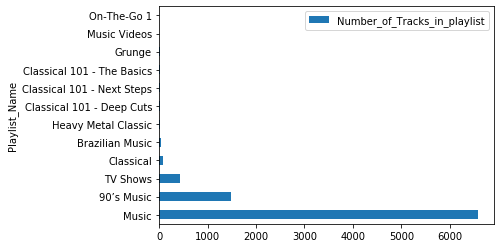

In [53]:
my_plot = df.plot(kind='barh', x='Playlist_Name', y='Number_of_Tracks_in_playlist')

Form the visualization here we could see that
the Music playlist has dominated all the other
playlists by having 6580 tracks in its list, which
is not a surprise since the database is about a
music store.

# 2- Which are the Top Genres that American Customers are Buying the Most ?

In [54]:
query = '''SELECT Genre.Name Genre_Name, count(InvoiceLine.Quantity) Count_of_Genre_Sales
from Genre
join Track
on Track.GenreId = Genre.GenreId
join InvoiceLine
on InvoiceLine.TrackId = Track.TrackId
join Invoice
on Invoice.InvoiceId = InvoiceLine.InvoiceId
join Customer
on Customer.CustomerId = Invoice.CustomerId
WHERE Customer.Country = 'USA'
Group by Genre_Name
ORDER by Count_of_Genre_Sales DESC'''

In [55]:
df = pd.read_sql_query(query, connection)
df.head(30)

,Genre_Name,Count_of_Genre_Sales
0,Rock,157
1,Latin,91
2,Metal,64
3,Alternative & Punk,50
4,Jazz,22
5,Blues,15
6,TV Shows,14
7,R&B/Soul,12
8,Classical,8
9,Comedy,8


#### plotting query result number 2

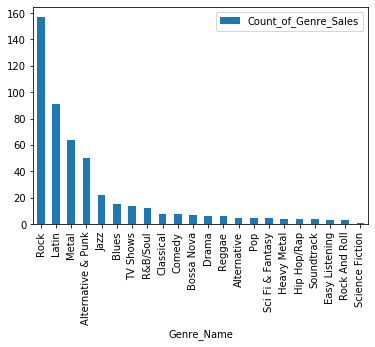

In [56]:
my_plot = df.plot(kind='bar', x='Genre_Name', y='Count_of_Genre_Sales')

Rock genre is the top genre that USA based
customers are buying the most, which is 66
more in count of track sales than the Latin
genre that came top second in the list.

# 3- Who are the Top 5 Artists with the most number of Music Tracks in the Store?

In [57]:
query = '''select  Artist.Name Artist_Name, count(Track.TrackId) Number_of_Tracks
from Track
Join PlaylistTrack
on PlaylistTrack.TrackId = Track.TrackId
Join Playlist
on Playlist.PlaylistId = PlaylistTrack.PlaylistId
JOIN Album
on Album.AlbumId = Track.AlbumId
Join Artist
on Artist.ArtistId = Album.ArtistId
GROUP by Artist.Name, Album.Title
Having Playlist.Name = 'Music'
ORDER BY Number_of_Tracks DESC
Limit 5'''

#### plotting query result number 3

In [62]:
df = pd.read_sql_query(query, connection)
df.head()



,Artist_Name,Number_of_Tracks
0,Lenny Kravitz,143
1,Eric Clapton,91
2,Chico Buarque,87
3,Chico Science & Nação Zumbi,69
4,Titãs,66


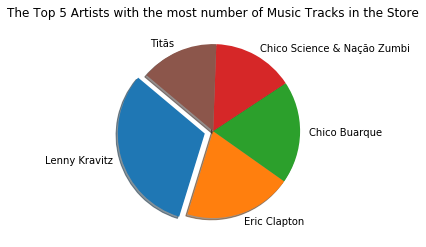

In [71]:
df =  pd.read_sql_query(query, connection)
A_data = df["Artist_Name"]
N_data = df["Number_of_Tracks"]
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#8c564b"]
explode = (0.1, 0, 0, 0, 0)  
plt.pie(N_data, labels=A_data, colors=colors,explode=explode, shadow=True, startangle=140)
plt.title("The Top 5 Artists with the most number of Music Tracks in the Store")
plt.show()

Lenny Kravitz is the top artist that has the
highest number of tracks in the store, having
143 songs, which is 52 more songs than Eric
Clapton who is the top second artist in the list.

# 4- Which are the Top 5 TV Shows with the Highest Number of Episodes in the Music Store?

In [72]:
query = '''Select artist.Name Tv_Show_Name, Album.Title Tv_Show_Season, count(Track.TrackId) Number_of_Episods
from Artist
Join Album
on album.ArtistId = Artist.ArtistId
Join Track
on Album.AlbumId = Track.AlbumId
Join Genre
on Track.GenreId = Genre.GenreId
GROUP by artist.Name, Album.Title
Having Genre.Name = 'TV Shows'
Order by Number_of_Episods DESC
Limit 5'''

#### plotting query result number 4

In [73]:
df = pd.read_sql_query(query, connection)
df.head()

,Tv_Show_Name,Tv_Show_Season,Number_of_Episods
0,Lost,"Lost, Season 3",26
1,Lost,"Lost, Season 1",25
2,The Office,"The Office, Season 3",25
3,Lost,"Lost, Season 2",24
4,Heroes,"Heroes, Season 1",23


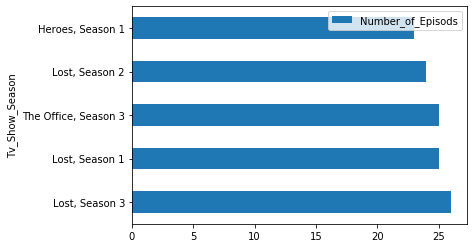

In [84]:

my_plot = df.plot(kind='barh', y='Number_of_Episods',x='Tv_Show_Season')

Lost Season 3 TV Show has the highest
number of episodes in the store, and it’s only
by one additional episode than its first season
that ranked second in the list.